In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy.stats import norm
from scipy import stats

from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [4]:
df_train = pd.read_csv("course_project_train.csv")
df_test = pd.read_csv("course_project_test.csv")

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [3]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [89]:
df_train.corr()

C:\Users\Mx3\AppData\Local\Temp\ipykernel_9012\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.000000,0.095519,0.039618,0.174372,0.175536,0.013559,-0.016418,-0.065371,-0.055273,0.013770,0.269446,0.432621,-0.036771,-0.081032
Years in current job,0.095519,1.000000,0.017889,0.041409,0.231587,0.009294,0.052720,-0.027276,0.053992,-0.009113,0.101786,0.110623,0.003734,-0.001377
Tax Liens,0.039618,0.017889,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.052446,0.057360,-0.007835,-0.010195,0.027211,0.010581,0.024368
Number of Open Accounts,0.174372,0.041409,-0.005360,1.000000,0.144819,0.023897,-0.017813,-0.032740,-0.019130,0.001346,0.267325,0.413904,0.016095,0.028884
Years of Credit History,0.175536,0.231587,0.009109,0.144819,1.000000,0.029247,0.071259,-0.015375,0.085699,0.010623,0.217856,0.191978,-0.015683,-0.020567
Maximum Open Credit,0.013559,0.009294,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.003849,-0.011650,-0.002334,0.088090,0.010197,-0.009136,-0.014275
Number of Credit Problems,-0.016418,0.052720,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.139905,0.730751,-0.008596,-0.124137,-0.042252,-0.018473,0.020088
Months since last delinquent,-0.065371,-0.027276,0.052446,-0.032740,-0.015375,-0.003849,0.139905,1.000000,0.162710,0.000459,-0.027198,-0.057702,-0.004395,0.002598
Bankruptcies,-0.055273,0.053992,0.057360,-0.019130,0.085699,-0.011650,0.730751,0.162710,1.000000,-0.005987,-0.142849,-0.079579,-0.027488,0.001648
Current Loan Amount,0.013770,-0.009113,-0.007835,0.001346,0.010623,-0.002334,-0.008596,0.000459,-0.005987,1.000000,0.016672,-0.009382,-0.108552,-0.226522


In [16]:
df_train.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1


### Обработка выбросов

In [55]:
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

**Home Ownership**

In [13]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [18]:
# Ошибка, home mortgage = have mortgage, исправляем:
df_train.loc[df_train['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'
df_train['Home Ownership'].value_counts()

Home Mortgage    3649
Rent             3204
Own Home          647
Name: Home Ownership, dtype: int64

**Annual Income**

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64


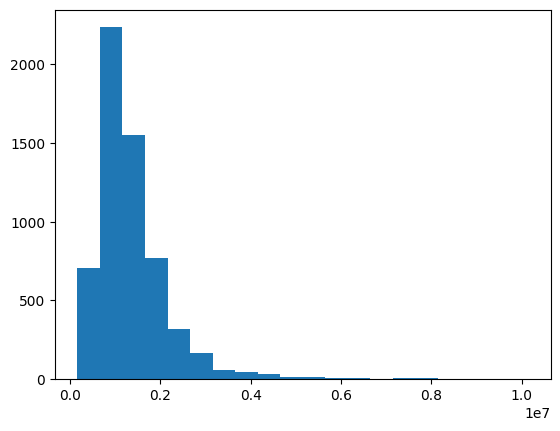

In [56]:
ai_describe = df_train['Annual Income'].describe()
print(ai_describe)

plt.hist(df_train['Annual Income'], bins=20)
plt.show()

In [57]:
# работа с выбросами и пропусками
ai_mean = df_train['Annual Income'].mean()
df_train['Annual Income'] = df_train['Annual Income'].fillna(ai_mean)
    
ai_max_value = np.quantile(df_train['Annual Income'], q = 0.975)
ai_min_value = np.quantile(df_train['Annual Income'], q = 0.025)

print(f'max_value = {ai_max_value}\nmin_value = {ai_min_value}\nmean = {ai_mean}')

df_train.loc[(df_train['Annual Income'] > ai_max_value) | (df_train['Annual Income'] < ai_min_value), 'Annual Income'] = ai_mean
print(f"\n{df_train['Annual Income'].describe()}")

max_value = 3201582.6499999985
min_value = 465657.7
mean = 1366391.7201749957

count    7.500000e+03
mean     1.312359e+06
std      4.869366e+05
min      4.659370e+05
25%      9.628962e+05
50%      1.366392e+06
75%      1.432348e+06
max      3.199448e+06
Name: Annual Income, dtype: float64


In [74]:
df_train['Annual Income'].isna().count()

7500

**Years in current job**

In [67]:
yj_describe = df_train['Years in current job'].describe()
print(yj_describe)
print(df_train['Years in current job'].unique())
# следует перевести признак в числовой формат

count          7129
unique           11
top       10+ years
freq           2332
Name: Years in current job, dtype: object
[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']


In [43]:
values = df_train['Years in current job'].copy()

for i in range(0, len(values)):
    if '+ years' in str(values[i]):
        values[i] = str(values[i]).replace('years', '')
    if 'years' in str(values[i]):
        values[i] = str(values[i]).replace('years', '')
    if '+' in str(values[i]):
        values[i] = str(values[i]).replace('+', '')
    if 'year' in str(values[i]):
        values[i] = str(values[i]).replace('year', '')
    if '< 1' in str(values[i]):
        values[i] = str(values[i]).replace('< 1', '0.5')
    df_train['Years in current job'][i] = values[i]
    
    
df_train['Years in current job'] = pd.to_numeric(df_train['Years in current job'], downcast = 'unsigned')
        
for i in range(0,len(values)):
    if df_train['Years in current job'][i] >= 10:
            df_train['Years in current job'][i] = random.randint(10,25)

C:\Users\Mx3\AppData\Local\Temp\ipykernel_9912\2019389851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Years in current job'][i] = values[i]
C:\Users\Mx3\AppData\Local\Temp\ipykernel_9912\2019389851.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Years in current job'][i] = random.randint(10,25)


In [75]:
# обработка выбросов 
yj_mode = df_train['Years in current job'].mode()
df_train['Years in current job'] = df_train['Years in current job'].fillna(yj_mode)

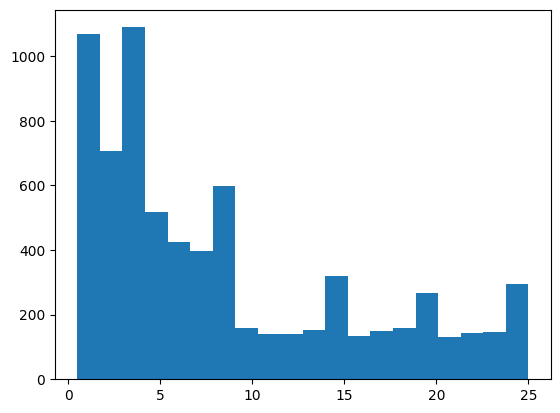

In [78]:
plt.hist(df_train['Years in current job'], bins=20)
plt.show()

**Tax Liens**

In [84]:
df_train['Tax Liens'].value_counts()
# данный признак не требует обработки

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

**Number of Open Accounts**

In [87]:
df_train['Number of Open Accounts'].unique()

array([11., 15.,  8., 13., 12.,  9., 17., 10.,  7.,  6., 14.,  3., 20.,
       19., 22., 18.,  5., 16.,  4.,  2., 23., 24., 21., 25., 32., 33.,
       31., 30., 29., 28., 26., 27., 43., 41., 34., 38., 35., 37., 42.])

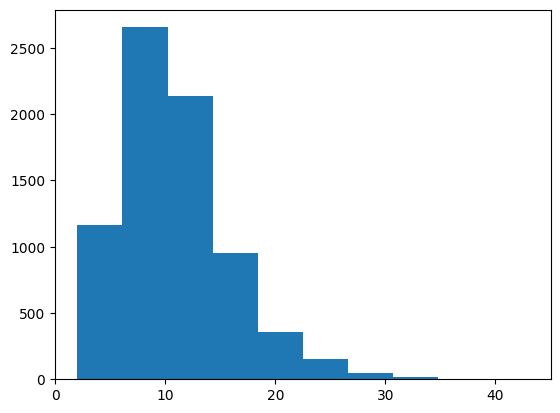

In [88]:
plt.hist(df_train['Number of Open Accounts'], bins=10)
plt.show()
# признак выглядит неплохо, можно оставить без изменений

**Years of Credit History**

In [92]:
df_train['Years of Credit History'].describe()

count    7500.000000
mean       18.317467
std         7.041946
min         4.000000
25%        13.500000
50%        17.000000
75%        21.800000
max        57.700000
Name: Years of Credit History, dtype: float64

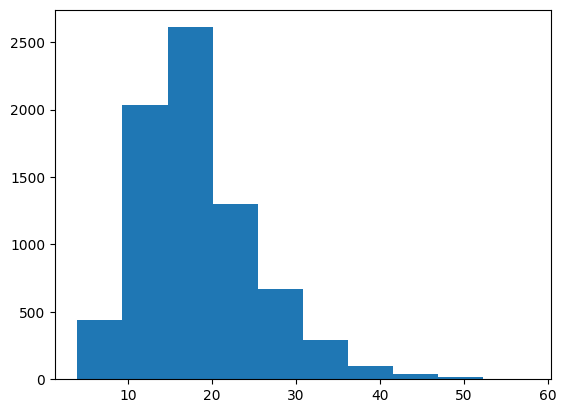

In [93]:
plt.hist(df_train['Years of Credit History'], bins=10)
plt.show()
# признак выглядит неплохо, можно оставить без изменений

**Maximum Open Credit**

In [94]:
df_train['Maximum Open Credit'].describe()

count    7.500000e+03
mean     9.451537e+05
std      1.602622e+07
min      0.000000e+00
25%      2.792295e+05
50%      4.781590e+05
75%      7.935015e+05
max      1.304726e+09
Name: Maximum Open Credit, dtype: float64

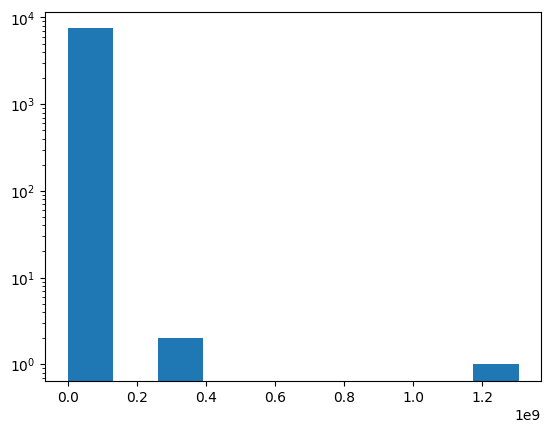

In [101]:
plt.hist(df_train['Maximum Open Credit'], log=True)
plt.show()
# есть выбросы, надо поправить

In [102]:
moc_max_value = np.quantile(df_train['Maximum Open Credit'], q = 0.975)
moc_min_value = np.quantile(df_train['Maximum Open Credit'], q = 0.025)
moc_median = df_train['Maximum Open Credit'].median()

print(f'max_value = {moc_max_value}\nmin_value = {moc_min_value}\nmean = {moc_median}')

df_train.loc[(df_train['Maximum Open Credit'] > moc_max_value) | (df_train['Maximum Open Credit'] < moc_min_value), 'Maximum Open Credit'] = moc_median

max_value = 2236204.2999999984
min_value = 70912.60000000002
mean = 478159.0


**Number of Credit Problems**

In [104]:
df_train['Number of Credit Problems'].describe()

count    7500.000000
mean        0.170000
std         0.498598
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Number of Credit Problems, dtype: float64

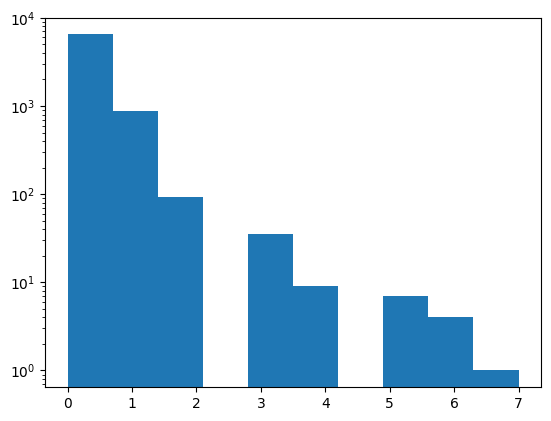

In [107]:
plt.hist(df_train['Number of Credit Problems'], log=True)
plt.show()
# признак выглядит неплохо, можно оставить без изменений

**Months since last delinquent**

In [120]:
df_train['Months since last delinquent'].isnull().value_counts()

True     4081
False    3419
Name: Months since last delinquent, dtype: int64

In [121]:
df_train['Months since last delinquent'].describe()

count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

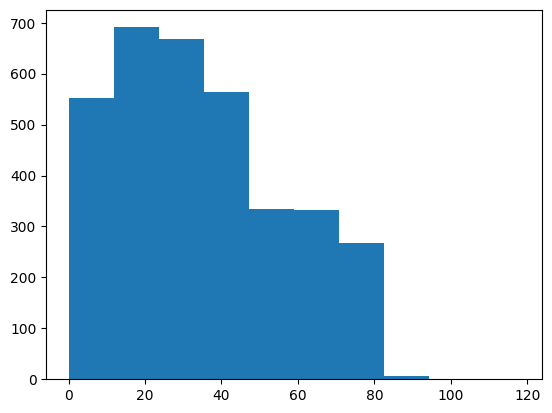

In [111]:
plt.hist(df_train['Months since last delinquent'])
plt.show()

In [122]:
# Не нравится верхняя граница + есть наны
md_mean = df_train['Months since last delinquent'].mean()
df_train['Months since last delinquent'] = df_train['Months since last delinquent'].fillna(md_mean)

md_max_value = np.quantile(df_train['Months since last delinquent'], q = 0.975)
print(f'max = {md_max_value}, mean = {md_mean}')

df_train.loc[(df_train['Months since last delinquent'] > md_max_value), 'Months since last delinquent'] = md_mean

max = 74.0, mean = 34.69260017548991


**Bankruptcies**

In [5]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [6]:
# работа с пропусками
df_train['Bankruptcies'] = df_train['Bankruptcies'].fillna(0)

**Purpose**

In [7]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [10]:
df_train.loc[df_train['Purpose'] == 'take a trip', 'Purpose'] = 'vacation'
df_train.loc[df_train['Purpose'] == 'renewable energy', 'Purpose'] = 'business loan'
df_train.loc[df_train['Purpose'] == 'small business', 'Purpose'] = 'business loan'
df_train.loc[df_train['Purpose'] == 'educational expenses', 'Purpose'] = 'major purchase'
df_train.loc[df_train['Purpose'] == 'medical bills', 'Purpose'] = 'major purchase'
df_train.loc[df_train['Purpose'] == 'buy a car', 'Purpose'] = 'major purchase'
df_train.loc[df_train['Purpose'] == 'wedding', 'Purpose'] = 'major purchase'
df_train.loc[df_train['Purpose'] == 'buy house', 'Purpose'] = 'major purchase'
df_train.loc[df_train['Purpose'] == 'moving', 'Purpose'] = 'other'

In [11]:
df_train['Purpose'].value_counts()

debt consolidation    5944
other                  676
home improvements      412
major purchase         266
business loan          157
vacation                45
Name: Purpose, dtype: int64

**Term**

In [12]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

**Current Loan Amount**

In [31]:
df_train['Current Loan Amount'].describe()

count    7.500000e+03
mean     1.187318e+07
std      3.192612e+07
min      1.124200e+04
25%      1.801690e+05
50%      3.095730e+05
75%      5.198820e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [34]:
df_train['Current Loan Amount'].isnull().count()

7500

**Current Credit Balance**

In [37]:
df_train['Current Credit Balance'].describe()

count    7.500000e+03
mean     2.898332e+05
std      3.178714e+05
min      0.000000e+00
25%      1.142565e+05
50%      2.093230e+05
75%      3.604062e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64

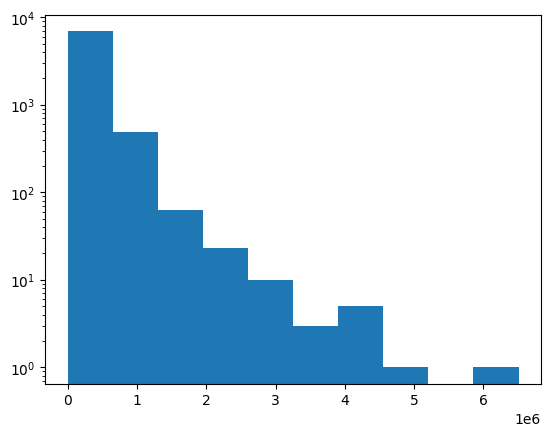

In [40]:
plt.hist(df_train['Current Credit Balance'], log=True)
plt.show()

**Monthly Debt**

In [41]:
df_train['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

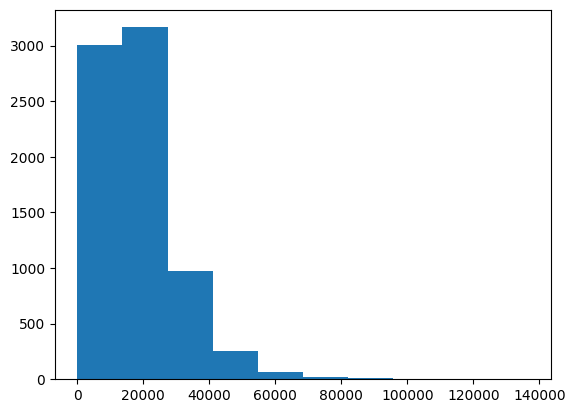

In [43]:
plt.hist(df_train['Monthly Debt'])
plt.show()

In [47]:
mdt_median = df_train['Monthly Debt'].median()

df_train.loc[(df_train['Monthly Debt'] == 0), 'Monthly Debt'] = mdt_median

In [48]:
df_train['Monthly Debt'].describe()

count      7500.000000
mean      18327.315333
std       11915.669777
min          17.000000
25%       10102.750000
50%       16077.250000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

**Credit Default**

In [50]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

**Preprocessing**

In [115]:
class DataPreprocessing():
    
    def __init__(self):
        self.medians = None

    def fit(self, X):       
        # Medians and quantiles
        self.medians = X.median(numeric_only = True)
        self.ai_max_value = np.quantile(X['Annual Income'], q = 0.975)
        self.ai_min_value = np.quantile(X['Annual Income'], q = 0.025)
        self.moc_max_value = np.quantile(X['Maximum Open Credit'], q = 0.975)
        self.moc_min_value = np.quantile(X['Maximum Open Credit'], q = 0.025)
        self.md_max_value = np.quantile(X['Months since last delinquent'], q = 0.975)

    def transform(self, X):
        
        # Annual Income
        X['Annual Income'] = X['Annual Income'].fillna(self.medians['Annual Income'])

        X.loc[(X['Annual Income'] > self.ai_max_value) | (X['Annual Income'] < self.ai_min_value), 'Annual Income'] = self.medians['Annual Income']

        # Maximum Open Credit
        X.loc[(X['Maximum Open Credit'] > self.moc_max_value) | (X['Maximum Open Credit'] < self.moc_min_value), 'Maximum Open Credit'] = self.medians['Maximum Open Credit']
    
        # Months since last delinquent
        X['Months since last delinquent'] = X['Months since last delinquent'].fillna(self.medians['Months since last delinquent'])

        X.loc[(X['Months since last delinquent'] > self.md_max_value), 'Months since last delinquent'] = self.medians['Months since last delinquent']

        # Bankruptcies
        X['Bankruptcies'] = X['Bankruptcies'].fillna(0)

        # Purpose
        #X.loc[X['Purpose'] == 'take a trip', 'Purpose'] = 'vacation'
        #X.loc[X['Purpose'] == 'renewable energy', 'Purpose'] = 'business loan'
        #X.loc[X['Purpose'] == 'small business', 'Purpose'] = 'business loan'
        #X.loc[X['Purpose'] == 'educational expenses', 'Purpose'] = 'major purchase'
        #X.loc[X['Purpose'] == 'medical bills', 'Purpose'] = 'major purchase'
        #X.loc[X['Purpose'] == 'buy a car', 'Purpose'] = 'major purchase'
        #X.loc[X['Purpose'] == 'wedding', 'Purpose'] = 'major purchase'
        #X.loc[X['Purpose'] == 'buy house', 'Purpose'] = 'major purchase'
        #X.loc[X['Purpose'] == 'moving', 'Purpose'] = 'other'

        # Monthly Debt
        X.loc[(X['Monthly Debt'] == 0), 'Monthly Debt'] = self.medians['Monthly Debt']

        return X

In [114]:
def feature_generator(df):
    # Home Ownership
    df.loc[df['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

    
    # Years in current job
    values = df['Years in current job'].copy()

    for i in range(0,len(values)):
        if '+ years' in str(values[i]):
            values[i] = str(values[i]).replace('years', '')
        if 'years' in str(values[i]):
            values[i] = str(values[i]).replace('years', '')
        if '+' in str(values[i]):
            values[i] = str(values[i]).replace('+', '')
        if 'year' in str(values[i]):
            values[i] = str(values[i]).replace('year', '')
        if '< 1' in str(values[i]):
            values[i] = str(values[i]).replace('< 1', '0.5')
        df['Years in current job'][i] = values[i]
    
    
    df['Years in current job'] = pd.to_numeric(df['Years in current job'], downcast = 'unsigned')
                
    for i in range(0,len(values)):
        if df['Years in current job'][i] >= 10:
              df['Years in current job'][i] = random.randint(10,25)
        
    yj_mode = df['Years in current job'].mode()
    df['Years in current job'] = df['Years in current job'].fillna(yj_mode)

    return df


In [116]:
def obj_to_float(df):
    # Home Ownership
    df['Home Ownership'] = df['Home Ownership'].map({'Home Mortgage': 0, 'Own Home': 1, 'Rent': 2}).astype(float)
    
    # Term
    df['Term'] = df['Term'].map({'Short Term': 0, 'Long Term':1}).astype(float)

**Балансировка значений**

In [64]:
def balancing(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1)

**Оценка обучения**

In [90]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

**Отбор признаков**

In [5]:
df_train.columns.tolist()

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [124]:
feature_names = ['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
'Monthly Debt']

target_name = 'Credit Default'

**Обучение модели**

In [194]:
df_train = pd.read_csv("course_project_train.csv")
df_test = pd.read_csv("course_project_test.csv")

In [195]:
def prep_df(df):
    feature_generator(df)
    preprocessor= DataPreprocessing()
    preprocessor.fit(df)
    preprocessor.transform(df)
    obj_to_float(df)

    return(df)

train_df_prep = prep_df(df_train)

C:\Users\Mx3\AppData\Local\Temp\ipykernel_9912\965129152.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years in current job'][i] = values[i]
C:\Users\Mx3\AppData\Local\Temp\ipykernel_9912\965129152.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years in current job'][i] = random.randint(10,25)


In [196]:
X = train_df_prep[feature_names]
Y = train_df_prep[target_name]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [198]:
df_to_balansing = pd.concat([X_train, y_train], axis=1)

df_balanced = balancing(df=df_to_balansing, target_name=target_name)

X_train = df_balanced.drop(columns=target_name)
y_train = df_balanced[target_name]

C:\Users\Mx3\AppData\Local\Temp\ipykernel_9912\3223615944.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(sample, ignore_index=True)


In [199]:
X_train['Home Ownership'].head()

2337    0.0
5472    0.0
181     0.0
1399    0.0
2269    0.0
Name: Home Ownership, dtype: float64

**XGB**

In [200]:
model_xgb = XGBClassifier(random_state=11)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

In [201]:
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4328
           1       0.96      0.96      0.96      3344

    accuracy                           0.97      7672
   macro avg       0.97      0.97      0.97      7672
weighted avg       0.97      0.97      0.97      7672

TEST

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1059
           1       0.43      0.41      0.42       441

    accuracy                           0.67      1500
   macro avg       0.59      0.59      0.59      1500
weighted avg       0.66      0.67      0.66      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               819  240
1               262  179


**LGBM**

In [202]:
model_lgbm = LGBMClassifier(random_state=11)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

In [203]:
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4328
           1       0.90      0.88      0.89      3344

    accuracy                           0.90      7672
   macro avg       0.90      0.90      0.90      7672
weighted avg       0.90      0.90      0.90      7672

TEST

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1059
           1       0.44      0.44      0.44       441

    accuracy                           0.67      1500
   macro avg       0.60      0.60      0.60      1500
weighted avg       0.67      0.67      0.67      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               809  250
1               247  194


**Тест**

In [204]:
df_test = df_test[feature_names]
df_test.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,Short Term,162470.0,105906.0,6813.0
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,Short Term,78298.0,46037.0,2318.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,Short Term,200178.0,146490.0,18729.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,Short Term,217382.0,213199.0,27559.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,Long Term,777634.0,425391.0,42605.0
5,Home Mortgage,922583.0,5 years,0.0,26.0,17.5,713174.0,0.0,41.0,0.0,Short Term,94028.0,135508.0,11148.0
6,Home Mortgage,1233309.0,3 years,0.0,7.0,22.0,376420.0,0.0,43.0,0.0,Short Term,454388.0,292904.0,8181.0
7,Rent,1215867.0,3 years,0.0,13.0,12.2,195888.0,0.0,19.0,0.0,Short Term,407726.0,120099.0,7599.0
8,Rent,NaN,5 years,0.0,8.0,9.1,370524.0,0.0,NaN,0.0,Short Term,131956.0,237747.0,10112.0
9,Home Mortgage,2140445.0,10+ years,1.0,15.0,16.7,867680.0,1.0,9.0,0.0,Short Term,391336.0,294500.0,18372.0


In [205]:
test_df_prep = prep_df(df_test)

C:\Users\Mx3\AppData\Local\Temp\ipykernel_9912\965129152.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years in current job'][i] = values[i]
C:\Users\Mx3\AppData\Local\Temp\ipykernel_9912\965129152.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years in current job'][i] = random.randint(10,25)


In [207]:
y_pred_output = model_lgbm.predict(test_df_prep)

In [208]:
y_pred_output.shape

(2500,)

In [209]:
result=pd.DataFrame({'Id':np.arange(2500), 'Credit Default': y_pred_output})

In [211]:
RESULT_PATH='./Cherkashin_predictions.csv'
result.to_csv(RESULT_PATH, index=False)

In [212]:
SAMPLE = './Cherkashin_predictions.csv'
df_sample = pd.read_csv(SAMPLE)

predictions = pd.DataFrame(index = df_sample['Id'])

predictions[target_name] = y_pred_output
predictions

,Credit Default
Id,
0,0
1,1
2,0
3,0
4,0
...,...
2495,0
2496,1
2497,1
